Importing Libraries

In [104]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import Sequential, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Loading Dataset. The Keras cifar10 has 10 small images dataset which are labelled as:
<br>

<br>
0	airplane
<br>
1	automobile
<br>
2	bird
<br>
3	cat
<br>
4	deer
<br>
5	dog
<br>
6	frog
<br>
7	horse
<br>
8	ship
<br>
9	truck
<br>

The Dataset has 50,000 Training images and 10,000 Test images
<br>

See more: https://keras.io/api/datasets/cifar10/

In [77]:
# Splitting Data
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [78]:
# Lets check the shape. Training data has 50,000 samples which are 50X50 pixels each and '3' means 'RGB' images. 'RGB' means that images are colored
X_train.shape

(50000, 32, 32, 3)

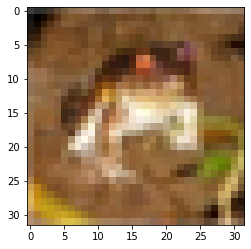

In [79]:
# Lets view an image
plt.imshow(X_train[0])
plt.show()

In [80]:
# Lets see the values of an image
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [81]:
# Notice the values of images ranges from(0-255). We have to normalize it so the model can process quickly.
# Normalize train and test set by 255
X_train=X_train/255
X_test=X_test/255


In [82]:
# Now all values are in range (0,1)
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [83]:
# Lets check Labels
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [84]:
# Convert labels from 2D to 1D
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [85]:
# Split Training Data to training and validation by 80/20
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [86]:
# View shapes
print("Training shape ", X_train.shape, y_train.shape)
print("Validation shape ", x_val.shape, y_val.shape)
print("Testing shape ", X_test.shape, y_test.shape)


Training shape  (40000, 32, 32, 3) (40000,)
Validation shape  (10000, 32, 32, 3) (10000,)
Testing shape  (10000, 32, 32, 3) (10000,)


LEts Build our CNN model
<br>
Filters --> Specify number of filters
<br>
Kernal_size --> Size of filters
<br>
input_shape --> The input we provide. In this case we are providing 32x32 pixel images 

In [105]:

model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D()) 

model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # flatten converts multidimensional data to 1 D compatible for further Dense layers
model.add(Dense(256, activation='relu'))

# Softmax used for 10 different classes. Softmax produces the output as probability distribution
model.add(Dense(10, activation='softmax'))

In [106]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 16)        9232      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 32)        

Training

In [108]:
history = model.fit(X_train,y_train, epochs=20, validation_data=(x_val,y_val))


Epoch 1/20
1250/1250 [==============================] - 33s 26ms/step - loss: 1.6461 - accuracy: 0.3948 - val_loss: 1.3975 - val_accuracy: 0.4866
Epoch 2/20
1250/1250 [==============================] - 32s 25ms/step - loss: 1.3242 - accuracy: 0.5260 - val_loss: 1.2869 - val_accuracy: 0.5421
Epoch 3/20
1250/1250 [==============================] - 32s 26ms/step - loss: 1.2058 - accuracy: 0.5729 - val_loss: 1.2073 - val_accuracy: 0.5775
Epoch 4/20
1250/1250 [==============================] - 35s 28ms/step - loss: 1.1309 - accuracy: 0.5996 - val_loss: 1.2060 - val_accuracy: 0.5768
Epoch 5/20
1250/1250 [==============================] - 33s 27ms/step - loss: 1.0714 - accuracy: 0.6220 - val_loss: 1.1234 - val_accuracy: 0.6004
Epoch 6/20
1250/1250 [==============================] - 34s 27ms/step - loss: 1.0116 - accuracy: 0.6434 - val_loss: 1.1064 - val_accuracy: 0.6127
Epoch 7/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9694 - accuracy: 0.6558 - val_loss: 1.0940 -

Plotting the training and validation accuracy

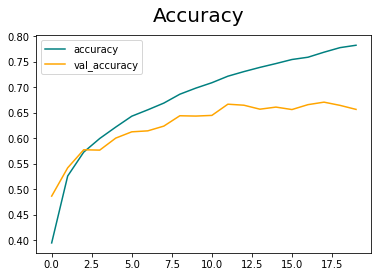

In [109]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [110]:
# Accuracy can be increased if we increase EPOCHS in training. We achieve 66% accuracy in these settings
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0448 - accuracy: 0.6628


[1.0448330640792847, 0.6628000140190125]

313/313 [==============================] - 2s 7ms/step


<Axes: >

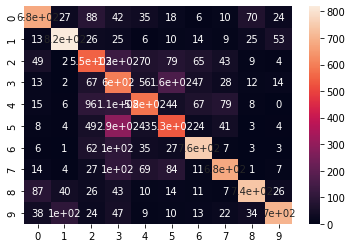

In [111]:
# Displaying Confusion Matrix

y_pred = model.predict(X_test)
y_pred=[np.argmax(i) for i in y_pred]
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)